 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [186]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [187]:
# Reading whale returns
whale_returns = Path("..\Starter_Code\Resources\whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index()
whale_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [188]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [189]:
# Drop nulls
whale_df = whale_df.dropna().copy()

#print first entries
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [190]:
# Reading algorithmic returns
algo_returns = Path("..\Starter_Code\Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [191]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [192]:
# Drop nulls
algo_df = algo_df.dropna().copy()

# print first rows
algo_df.head()




,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [193]:
# Reading S&P 500 Closing Prices
sp500_history = Path("..\Starter_Code\Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [194]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [195]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype(str).astype(float)

<ipython-input-195-b4ae44339e0e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


In [236]:
# Calculate and print Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,SP500
Date,
2019-04-22,NaN
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510
2019-04-15,-1.223394


In [197]:
# Drop nulls
sp500_df= sp500_df.dropna().copy()
sp500_df.head()


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [198]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns = {"Close": "SP500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [199]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_df], axis = "columns", join = "inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [3]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(18,5))

NameError: name 'combined_returns' is not defined

#### Calculate and Plot cumulative returns.

In [4]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(18,5))


NameError: name 'combined_returns' is not defined

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

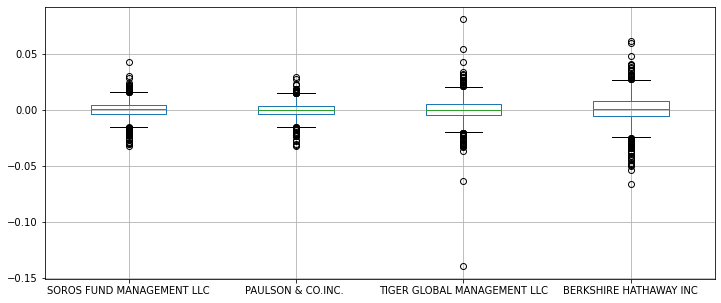

In [202]:
# Box plots to visually show risk

# Whale Boxplot
whale_df.boxplot(figsize = (12, 5))

<AxesSubplot:>

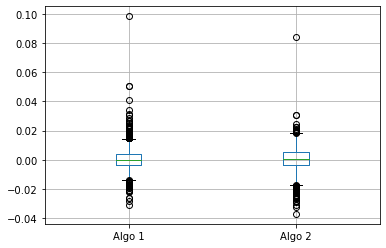

In [203]:
# Algo Boxplot
algo_df.boxplot()

<AxesSubplot:>

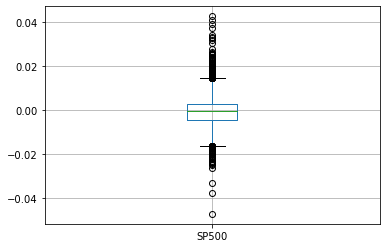

In [204]:
# SP500 Boxplot
sp500_df.boxplot()

### Calculate Standard Deviations

In [205]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev_port = combined_returns.std()

daily_std_dev_port


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [206]:
# Calculate  the daily standard deviation of S&P 500
daily_std_dev_sp500 = sp500_df.std()
daily_std_dev_sp500 = daily_std_dev_port[-1]
port_riskier_than_sp500 = daily_std_dev_port.loc[daily_std_dev_port > daily_std_dev_sp500]
port_riskier_than_sp500 = (round(port_riskier_than_sp500, 4)*100)
daily_std_dev_sp500 = (round(daily_std_dev_sp500,4)*100)

print("Standard Deviation is a measure of the riskiness of a portfolio.\n" 
    + ("The portfolios that are riskier than the S&P 500 are:\n") 
    + str(port_riskier_than_sp500)
    + "\nThe standard deviation and thus riskiness of the S&P 500 is " + str(daily_std_dev_sp500)
    )

Standard Deviation is a measure of the riskiness of a portfolio.
The portfolios that are riskier than the S&P 500 are:
TIGER GLOBAL MANAGEMENT LLC    1.09
BERKSHIRE HATHAWAY INC         1.29
dtype: float64
The standard deviation and thus riskiness of the S&P 500 is 0.86


### Calculate the Annualized Standard Deviation

In [207]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std_dev = daily_std_dev_port * np.sqrt(252)
annualized_std_dev.head()


SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

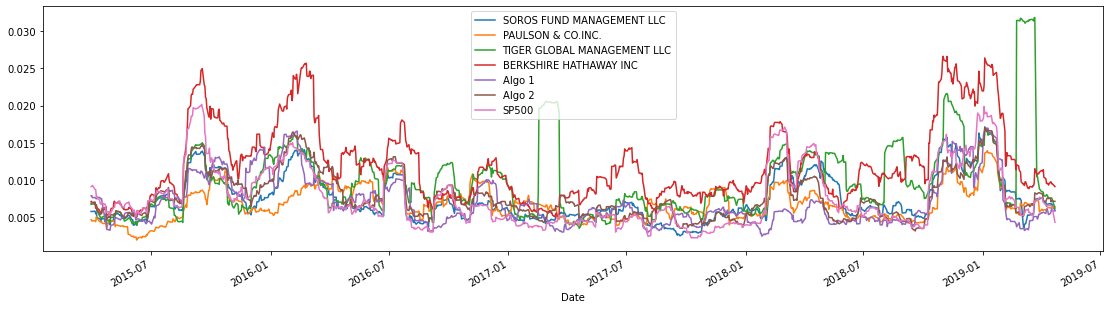

In [208]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation

combined_returns.rolling(window=21).std().plot(figsize=(19,5))

### Calculate and plot the correlation

In [209]:
# Calculate the correlation
correlation = combined_returns.corr()


# Display the correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling Beta of Algo 1'}, xlabel='Date'>

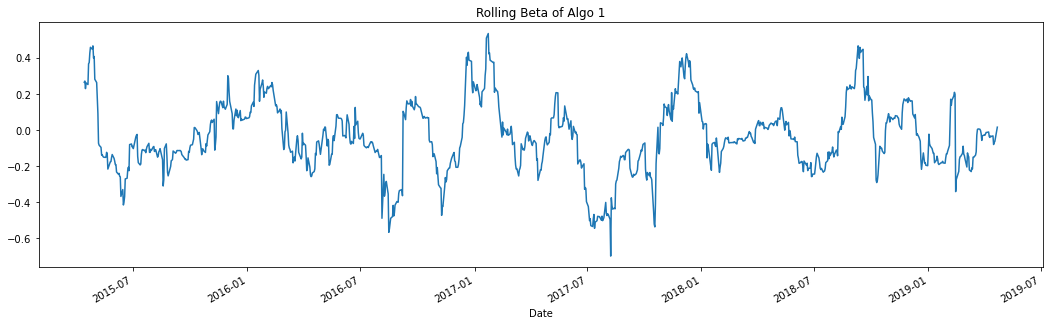

In [238]:
# Calculate covariance of a single portfolio
covariance = combined_returns["Algo 1"].cov(combined_returns["SP500"])

# Calculate variance of S&P 500
variance = combined_returns["SP500"].var()

# Computing beta
Algo_1_beta = covariance / variance

# Calculate rolling covariance
rolling_covariance = combined_returns["Algo 1"].rolling(window=30).cov(combined_returns["SP500"])

# Calculate rolling variance of SP500
rolling_variance = combined_returns['SP500'].rolling(window=30).var()

# Plot beta trend
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title="Rolling Beta of Algo 1",figsize = (18,5))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [211]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [212]:
# Add risk free rate column

risk_free_rate_path= Path("../Starter_Code/Resources/risk_free_rate.csv")
risk_free_rate = pd.read_csv(risk_free_rate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
combined_returns_including_rfrate = pd.concat([combined_returns, risk_free_rate], axis = "columns", join = "inner")

# Annualized Sharpe Ratios
combined_returns_sharpe_ratio = ((combined_returns_including_rfrate.mean()-combined_returns_including_rfrate['rf_rate'].mean()) * 252) / (combined_returns_including_rfrate.std() * np.sqrt(252))
combined_returns_sharpe_ratio




SOROS FUND MANAGEMENT LLC      0.190407
PAULSON & CO.INC.             -0.710552
TIGER GLOBAL MANAGEMENT LLC   -0.289643
BERKSHIRE HATHAWAY INC         0.506337
Algo 1                         1.138814
Algo 2                         0.297261
SP500                         -0.779208
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

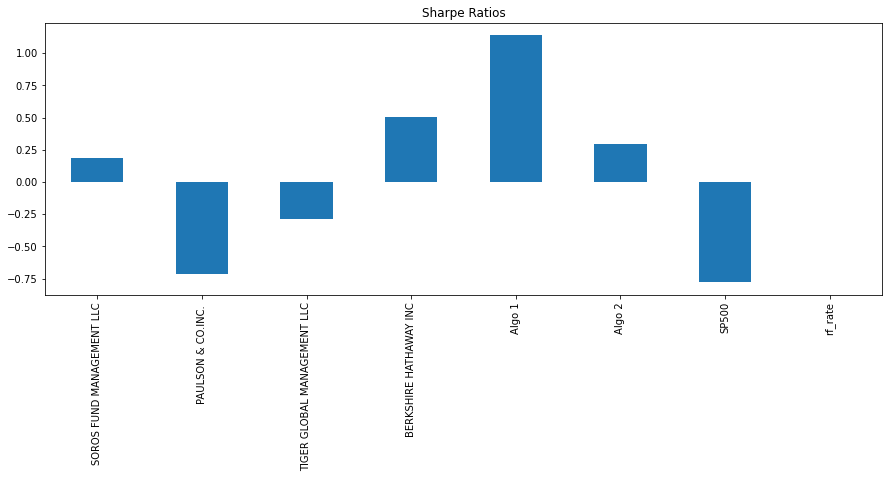

In [213]:
# Visualize the sharpe ratios as a bar plot
combined_returns_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios", figsize=(15,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Sharpe Ratio is a measure of the amount of reward for a given amount of risk. A higher Sharpe Ratio is an indication of higher reward for the given amount of risk.
The Algo 1 strategy outperforms the market and all whale portfolios. Algo 2 strategy outperforms the market and all whale portfoliios except the Berkshire Hathaway portfolio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [214]:
# Reading data from BAC stock data - Bank of America
bac_df = Path("..\Starter_Code\Resources\BAC_stock_data.csv")
bac_df = pd.read_csv(bac_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
bac_df.rename(columns = {"Close": "BAC"}, inplace = True)
bac_df.sort_index()
# bac_df["Date"] = bac_df["Date"].str.replace("16:00:00", "")
bac_df.tail()

,BAC
Date,
2019-04-15,29.84
2019-04-16,29.88
2019-04-17,30.03
2019-04-18,30.03
2019-04-22,30.05


In [215]:
# Reading data from INTC stock date - Intel
intc_df = Path("..\Starter_Code\Resources\INTC_stock_data.csv")
intc_df = pd.read_csv(intc_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
intc_df.rename(columns = {"Close": "INTC"}, inplace = True)
intc_df.sort_index()
intc_df.tail()

,INTC
Date,
2019-04-15,56.28
2019-04-16,56.71
2019-04-17,58.56
2019-04-18,58.49
2019-04-22,58.82


In [216]:
# Reading data from JNJ stock date - Johnson and Johnson
jnj_df = Path("..\Starter_Code\Resources\JNJ_stock_data.csv")
jnj_df = pd.read_csv(jnj_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
jnj_df.rename(columns = {"Close": "JNJ"}, inplace = True)
jnj_df.sort_index()
jnj_df.head()

,JNJ
Date,
2012-10-01,69.13
2012-10-02,68.96
2012-10-03,69.00
2012-10-04,69.27
2012-10-05,69.65


In [217]:
# Reading data from WMT stock data - Walmart
wmt_df = Path("..\Starter_Code\Resources\WMT_stock_data.csv")
wmt_df = pd.read_csv(wmt_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
wmt_df.rename(columns = {"Close": "WMT"}, inplace = True)
wmt_df.sort_index()
wmt_df.head()

,WMT
Date,
2012-10-01,74.05
2012-10-02,73.75
2012-10-03,74.20
2012-10-04,74.20
2012-10-05,75.13


In [218]:
# Combine all stocks in a single DataFrame
combined_returns_my_portfolio = pd.concat([bac_df, intc_df, jnj_df, wmt_df], axis = "columns", join = "inner")
combined_returns_my_portfolio.tail()

,BAC,INTC,JNJ,WMT
Date,,,,
2019-04-15,29.84,56.28,136.52,102.43
2019-04-16,29.88,56.71,138.02,102.93
2019-04-17,30.03,58.56,138.52,103.16
2019-04-18,30.03,58.49,137.52,103.18
2019-04-22,30.05,58.82,137.83,102.37


In [220]:
# Reorganize portfolio data by having a column per symbol
combined_returns_my_portfolio.head()

,BAC,INTC,JNJ,WMT
Date,,,,
2012-10-01,8.96,22.76,69.13,74.05
2012-10-02,8.93,22.84,68.96,73.75
2012-10-03,9.11,22.55,69.00,74.20
2012-10-04,9.41,22.47,69.27,74.20
2012-10-05,9.32,22.68,69.65,75.13


In [221]:
# Calculate daily returns
daily_returns_my_portfolio = combined_returns_my_portfolio.pct_change()

# Drop NAs
daily_returns_my_portfolio = daily_returns_my_portfolio.dropna().copy()

# Display sample data
daily_returns_my_portfolio.head()


,BAC,INTC,JNJ,WMT
Date,,,,
2012-10-02,-0.003348,0.003515,-0.002459,-0.004051
2012-10-03,0.020157,-0.012697,0.000580,0.006102
2012-10-04,0.032931,-0.003548,0.003913,0.000000
2012-10-05,-0.009564,0.009346,0.005486,0.012534
2012-10-08,-0.004292,-0.007496,-0.003015,0.001597


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

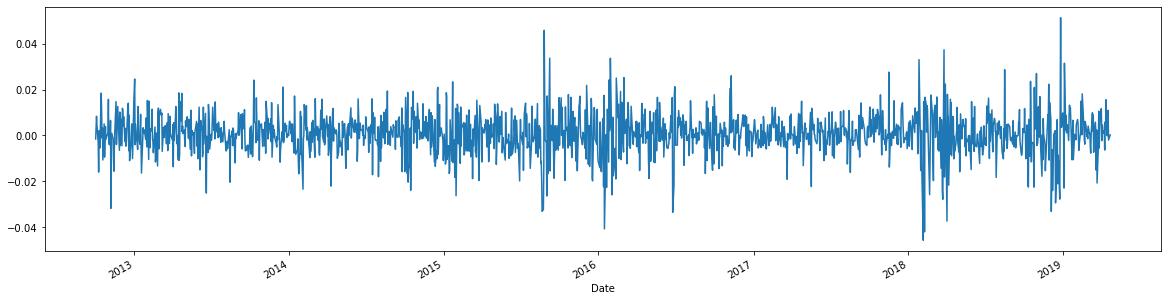

In [222]:
# Set weights
weights = [0.25, 0.25, 0.25, 0.25]

# Calculate portfolio return
my_portfolio_returns = daily_returns_my_portfolio.dot(weights)

# Display sample data
my_portfolio_returns.plot(figsize=(20,5))



In [223]:
my_portfolio_returns.head()

Date
2012-10-02   -0.001586
2012-10-03    0.003535
2012-10-04    0.008324
2012-10-05    0.004450
2012-10-08   -0.003301
dtype: float64

<AxesSubplot:xlabel='Date'>

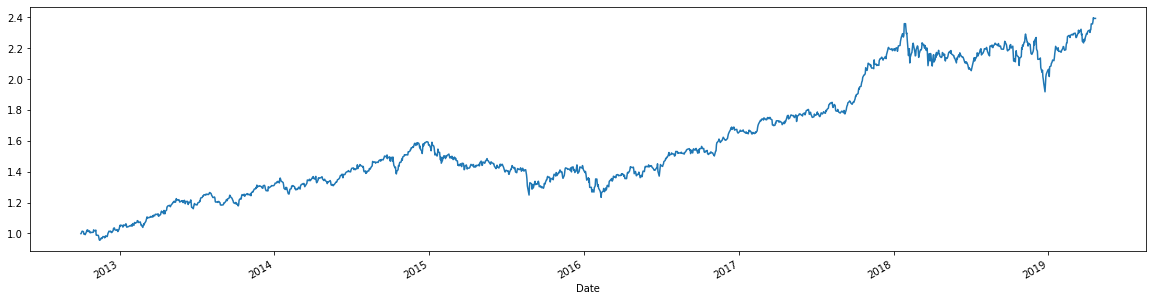

In [224]:
#Calculate and plot my portfolio cumulative return

my_portfolio_cumulative_return = (1 + my_portfolio_returns).cumprod()
my_portfolio_cumulative_return.plot(figsize = (20, 5))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [225]:
# Join your returns DataFrame to the original returns DataFrame
total_combined_returns = pd.concat([combined_returns, my_portfolio_returns], axis = "columns", join = "inner")
total_combined_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
0                              0
dtype: int64

In [226]:
total_combined_returns.to_csv("my_portfolio_returns.csv")

In [227]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_combined_returns = total_combined_returns.dropna().copy()
total_combined_returns.rename(columns={0:"Andrews portfolio"}, inplace=True)

total_combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Andrews portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.003126
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.007025
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.004804
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.009373
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.002060


In [228]:
total_combined_returns.to_csv("my_portfolio_returns.csv")

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [229]:
# Calculate the annualized `std`

total_combined_returns_std_dev = total_combined_returns.std()

total_combined_returns_std_dev


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
Andrews portfolio              0.009589
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

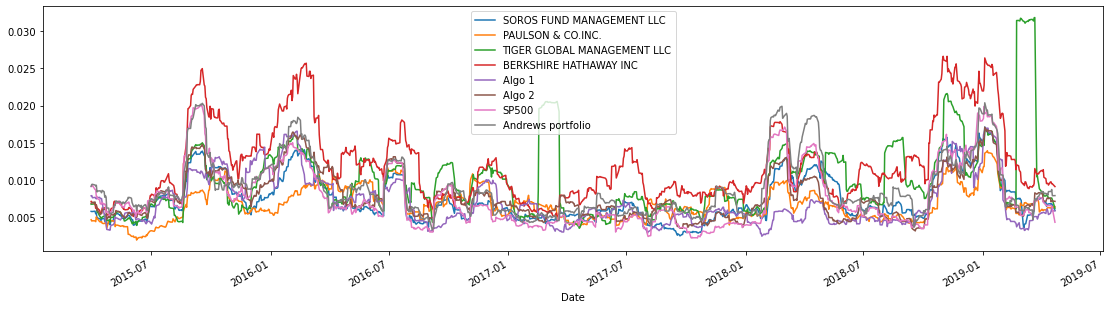

In [230]:
# Calculate rolling standard deviation
total_combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation

total_combined_returns.rolling(window=21).std().plot(figsize=(19,5))




### Calculate and plot the correlation

In [231]:
# Calculate correlation and display matrix

correlation_total_combined_returns = total_combined_returns.corr()
correlation_total_combined_returns



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Andrews portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.682282
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.548408
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.546999
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.581930
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.200517
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.711999
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,0.031116
Andrews portfolio,0.682282,0.548408,0.546999,0.581930,0.200517,0.711999,0.031116,1.000000


<AxesSubplot:>

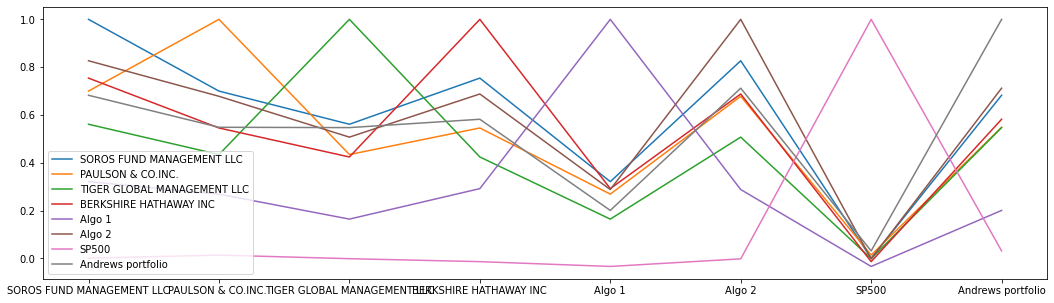

In [232]:
# Plot the correlation
correlation_total_combined_returns.plot(figsize=(18,5))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling Beta of Andrews Portfolio'}, xlabel='Date'>

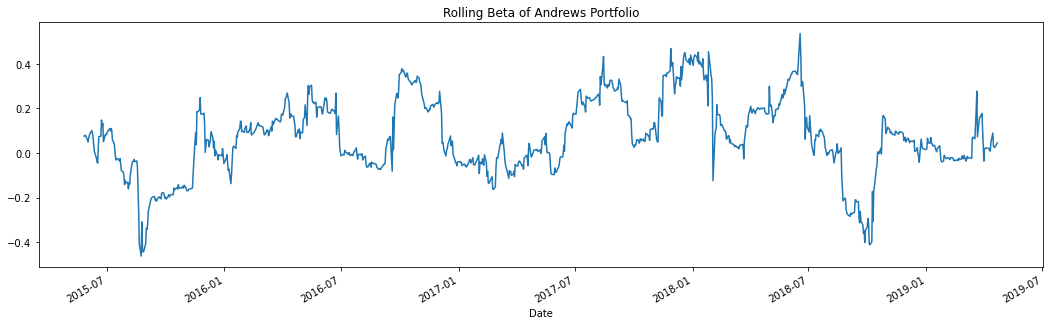

In [233]:
# Calculate and plot Beta

# Calculate covariance of a Andrews Portfolio
covariance_total_combined_returns = total_combined_returns["Andrews portfolio"].cov(total_combined_returns["SP500"])


# Calculate variance of S&P 500
variance_total_combined_returns = total_combined_returns["SP500"].var()

# Computing beta
andrews_portfolio_beta = covariance_total_combined_returns / variance_total_combined_returns

# Calculate rolling covariance
rolling_covariance_andrews_portfolio = total_combined_returns["Andrews portfolio"].rolling(window=60).cov(combined_returns["SP500"])

# Calculate rolling variance of SP500
rolling_variance_andrews_portfolio = total_combined_returns['SP500'].rolling(window=60).var()

# Plot beta trend
rolling_beta_andrews_portfolio = rolling_covariance_andrews_portfolio / rolling_variance_andrews_portfolio
rolling_beta_andrews_portfolio.plot(title="Rolling Beta of Andrews Portfolio", figsize = (18,5))


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [234]:
# Calculate Annualzied Sharpe Ratios

# Add risk free rate column

total_combined_returns_including_rfrate = pd.concat([total_combined_returns, risk_free_rate], axis = "columns", join = "inner")

# Annualized Sharpe Ratios
total_combined_returns_sharpe_ratio = ((total_combined_returns_including_rfrate.mean()-total_combined_returns_including_rfrate['rf_rate'].mean()) * 252) / (total_combined_returns_including_rfrate.std() * np.sqrt(252))
total_combined_returns_sharpe_ratio


SOROS FUND MANAGEMENT LLC      0.190407
PAULSON & CO.INC.             -0.710552
TIGER GLOBAL MANAGEMENT LLC   -0.289643
BERKSHIRE HATHAWAY INC         0.506337
Algo 1                         1.138814
Algo 2                         0.297261
SP500                         -0.779208
Andrews portfolio              0.674379
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

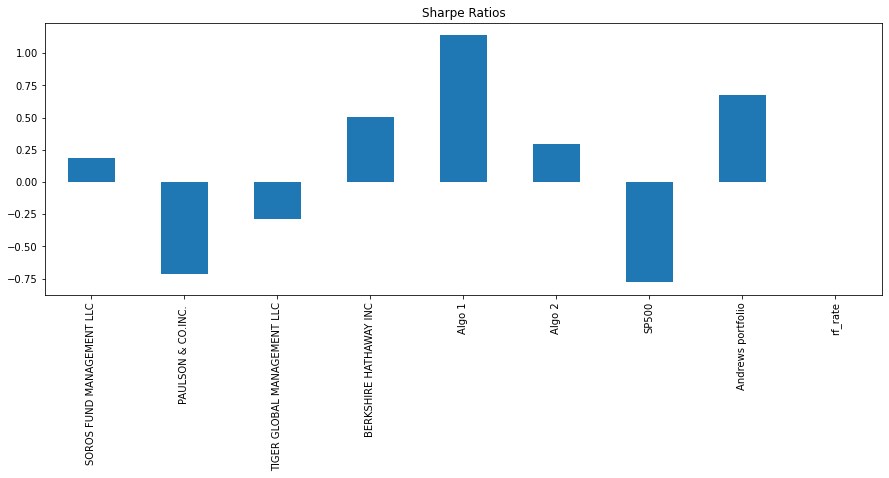

In [235]:
# Visualize the sharpe ratios as a bar plot
total_combined_returns_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios", figsize=(15,5))


### How does your portfolio do?

# Andrews portfolio outperforms the market and the whale portfolios. However, it does not outperform the Algo 1 portfolio when measured by the Sharpe Ratio.